In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Zola-Emile','Balzac-Honore-de']

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
with open("test_dumas_etc-llda-doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        #if docname.split('_')[1] in list_authors_to_replace:
            #docname=replace_all(docname, list_authors_to_replace)
        mallet_docnames.append(int(docname))
        print(docname)
        index_topic=0
        for share in grouper(1, values):
            triple = (int(docname), index_topic, float(share[0]))
            doctopic_triples.append(triple)
            index_topic+=1

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [7]:
print(doctopic_triples)

[(2, 0, 0.1493763310009127), (2, 1, 0.1676300578034682), (2, 2, 0.15546090660176454), (2, 3, 0.07636142379069061), (2, 4, 0.00030422878004259207), (2, 5, 0.052023121387283246), (2, 6, 0.024642531183449955), (2, 7, 0.05506540918770916), (2, 8, 0.07027684818983876), (2, 9, 0.00030422878004259207), (2, 10, 0.07940371159111653), (2, 11, 0.05506540918770916), (2, 12, 0.00030422878004259207), (2, 13, 0.021600243383024034), (2, 14, 0.06723456038941285), (2, 15, 0.00030422878004259207), (2, 16, 0.024642531183449955), (3, 0, 0.01236056677720832), (3, 1, 0.18420259270425085), (3, 2, 0.07265601447090746), (3, 3, 0.08471510400964728), (3, 4, 0.14199577931866145), (3, 5, 0.00030147723846849563), (3, 6, 0.0033162496231534523), (3, 7, 0.14802532408803137), (3, 8, 0.00030147723846849563), (3, 9, 0.0033162496231534523), (3, 10, 0.00030147723846849563), (3, 11, 0.0907446487790172), (3, 12, 0.16309918601145615), (3, 13, 0.00030147723846849563), (3, 14, 0.08170033162496232), (3, 15, 0.00030147723846849563

In [8]:
mallet_docnames = sorted(mallet_docnames)

In [9]:
num_docs = len(mallet_docnames)

In [10]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0))

In [11]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

408
17


In [12]:
doctopic = np.zeros((num_docs, num_topics))

In [13]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [14]:
novel_names = []

In [15]:
for fn in mallet_docnames:
    basename = os.path.basename(str(fn))
    name, ext = os.path.splitext(basename)
    novel_names.append(name)
print(len(novel_names))

24


In [16]:
novel_names = np.asarray(novel_names)

In [17]:
doctopic

array([[  1.49376331e-01,   1.67630058e-01,   1.55460907e-01,
          7.63614238e-02,   3.04228780e-04,   5.20231214e-02,
          2.46425312e-02,   5.50654092e-02,   7.02768482e-02,
          3.04228780e-04,   7.94037116e-02,   5.50654092e-02,
          3.04228780e-04,   2.16002434e-02,   6.72345604e-02,
          3.04228780e-04,   2.46425312e-02],
       [  1.23605668e-02,   1.84202593e-01,   7.26560145e-02,
          8.47151040e-02,   1.41995779e-01,   3.01477238e-04,
          3.31624962e-03,   1.48025324e-01,   3.01477238e-04,
          3.31624962e-03,   3.01477238e-04,   9.07446488e-02,
          1.63099186e-01,   3.01477238e-04,   8.17003316e-02,
          3.01477238e-04,   1.23605668e-02],
       [  2.81928390e-04,   1.94812518e-01,   2.51198196e-01,
          9.89568650e-02,   2.34282492e-01,   2.81928390e-04,
          8.73978010e-03,   2.81928390e-04,   2.81928390e-04,
          3.41133352e-02,   3.10121229e-03,   1.13053284e-01,
          2.81928390e-04,   2.81928390e-04

In [18]:
doctopic_orig = doctopic.copy()

In [19]:
num_groups = len(set(novel_names))
print(num_groups)

24


In [20]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [21]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [22]:
doctopic = doctopic_grouped

In [23]:
doctopic

array([[  2.81124498e-02,   1.73308619e-01,   2.90701267e-01,
          9.29873340e-02,   2.81124498e-02,   8.98980538e-02,
          6.48748842e-03,   3.08928020e-04,   3.08928020e-04,
          3.73802904e-02,   1.57553290e-02,   3.08928020e-04,
          1.88446092e-02,   3.08928020e-04,   1.26969416e-01,
          8.98980538e-02,   3.08928020e-04],
       [  6.32420645e-02,   1.62587836e-01,   1.06857281e-01,
          5.59728616e-02,   1.96268476e-02,   7.29343349e-02,
          2.66537436e-03,   1.23576448e-02,   2.42306760e-04,
          1.35934093e-01,   2.42306760e-04,   2.42306760e-04,
          2.42306760e-04,   2.42306760e-04,   2.64356676e-01,
          7.29343349e-02,   2.93191180e-02],
       [  2.99156921e-03,   2.34158281e-01,   1.25373946e-01,
          3.83464781e-02,   2.71960838e-04,   3.01876530e-02,
          2.47484362e-02,   2.71960838e-04,   1.17215121e-01,
          1.87924939e-01,   2.71960838e-04,   2.71960838e-04,
          1.22654338e-01,   2.71960838e-04

In [24]:
N, K = doctopic.shape
print(K)

17


In [25]:
ind = np.arange(N)

In [26]:
width = 0.5

In [27]:
plt.rcParams["figure.figsize"] = [16,9]

In [28]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 24 artists>

In [29]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f975b895080>,
 <a list of 24 Text xticklabel objects>)

In [30]:
list_topics =['aventure' ,'argent' ,'mort', 'amitié' ,'amour' ,'art' ,'crime' ,'éducation' ,'enfance' ,'famille' ,'folie' ,'guerre' ,'maladie' ,'nature' ,'politique' ,'dieu' ,'ville']

In [31]:
plt.title('Share of Topic '+list_topics[0])

Text(0.5,1,'Share of Topic aventure')

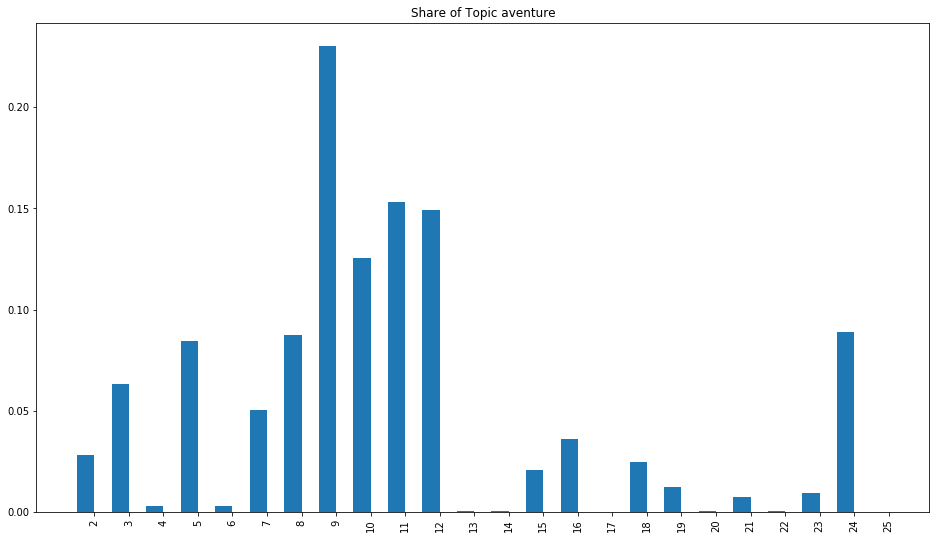

In [32]:
plt.show()

In [33]:
plots = []

In [34]:
height_cumulative = np.zeros(N)

In [35]:
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [36]:
plt.ylim((0, 1))

(0, 1)

In [37]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [38]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [39]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1

In [40]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f97594def28>],
 <a list of 1 Text yticklabel objects>)

In [41]:
list_topics =['aventure' ,'argent' ,'mort', 'amitié' ,'amour' ,'art' ,'crime' ,'éducation' ,'enfance' ,'famille' ,'folie' ,'guerre' ,'maladie' ,'nature' ,'politique' ,'dieu' ,'ville']

In [42]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics]

In [43]:
plt.legend([p[0] for p in plots], topic_labels)

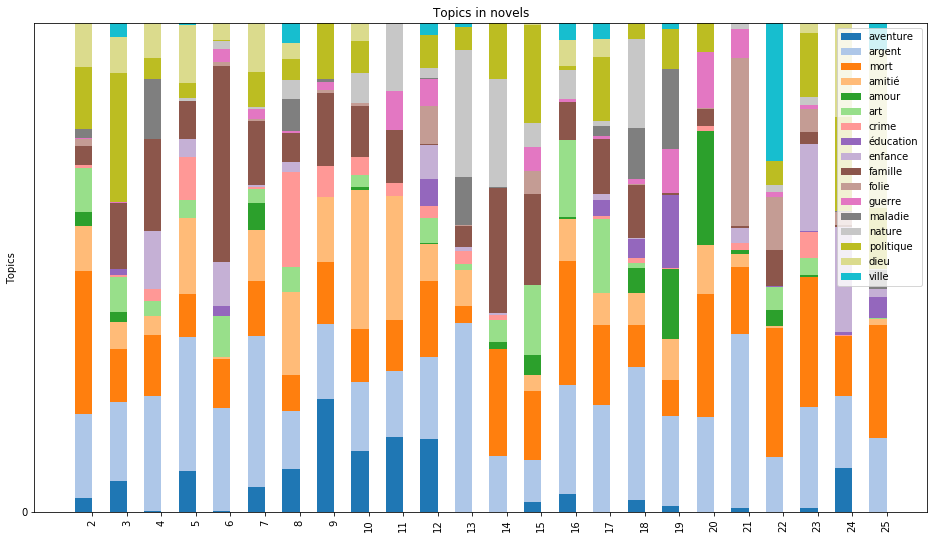

In [44]:
plt.show()